In [1]:
import numpy as np
import sklearn
import pandas as pd

%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('datasets/FPU3_MLtrackTemperature.csv')

In [3]:
df.columns

Index(['field', ' time', ' temperature', ' ra', ' dec', ' az', ' alt',
       ' airmass', ' ha', ' FU1_ra', ' FU1_dec', ' FU1_Delta_ra',
       ' FU1_Delta_dec', ' FU1_distance', ' FU1_Delta_Teff',
       ' FU1_X_calculated', ' FU1_Y_calculated', ' FU1_X_observed',
       ' FU1_Y_observed', ' FU2_ra', ' FU2_dec', ' FU2_Delta_ra',
       ' FU2_Delta_dec', ' FU2_distance', ' FU2_Delta_Teff',
       ' FU2_X_calculated', ' FU2_Y_calculated', ' FU2_X_observed',
       ' FU2_Y_observed', ' FU3_ra', ' FU3_dec', ' FU3_Delta_ra',
       ' FU3_Delta_dec', ' FU3_distance', ' FU3_Delta_Teff',
       ' FU3_X_calculated', ' FU3_Y_calculated', ' FU3_X_observed',
       ' FU3_Y_observed', ' FU4_ra', ' FU4_dec', ' FU4_Delta_ra',
       ' FU4_Delta_dec', ' FU4_distance', ' FU4_Delta_Teff',
       ' FU4_X_calculated', ' FU4_Y_calculated', ' FU4_X_observed',
       ' FU4_Y_observed', ' FU5_ra', ' FU5_dec', ' FU5_Delta_ra',
       ' FU5_Delta_dec', ' FU5_distance', ' FU5_Delta_Teff',
       ' FU5_X_calcula

In [4]:
# Columns have extra spaces; let's correct that (and remove field, just to keep a fully numeric dataframe; why?)
df = pd.DataFrame(df.values[:, 1:], columns=df.columns.str.strip(' ')[1:], dtype='float64')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2395 entries, 0 to 2394
Data columns (total 58 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   time              2395 non-null   float64
 1   temperature       2395 non-null   float64
 2   ra                2395 non-null   float64
 3   dec               2395 non-null   float64
 4   az                2395 non-null   float64
 5   alt               2395 non-null   float64
 6   airmass           2395 non-null   float64
 7   ha                2395 non-null   float64
 8   FU1_ra            2395 non-null   float64
 9   FU1_dec           2395 non-null   float64
 10  FU1_Delta_ra      2395 non-null   float64
 11  FU1_Delta_dec     2395 non-null   float64
 12  FU1_distance      2395 non-null   float64
 13  FU1_Delta_Teff    2395 non-null   float64
 14  FU1_X_calculated  2395 non-null   float64
 15  FU1_Y_calculated  2395 non-null   float64
 16  FU1_X_observed    2395 non-null   float64


In [6]:
df.describe().loc[: , ['FU1_X_calculated', 'FU2_X_calculated', 'FU3_X_calculated', 'FU4_X_calculated']]

,FU1_X_calculated,FU2_X_calculated,FU3_X_calculated,FU4_X_calculated
count,2.395000e+03,2.395000e+03,2.395000e+03,2.395000e+03
mean,3.825842e+06,-2.127568e+05,2.069379e+06,1.095594e+06
std,1.202955e+07,9.508147e+06,1.031134e+07,9.802219e+06
min,-2.158133e+07,-2.039550e+07,-2.158919e+07,-2.285402e+07
25%,-2.511454e+06,-8.302461e+06,-6.632960e+06,-4.870940e+06
50%,3.525298e+06,1.234229e+06,1.714690e+05,-3.547800e+05
75%,1.488454e+07,6.425840e+06,1.069218e+07,7.421995e+06
max,2.268384e+07,2.348568e+07,2.257321e+07,2.227233e+07


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12220bfa0>,
      dtype=object)

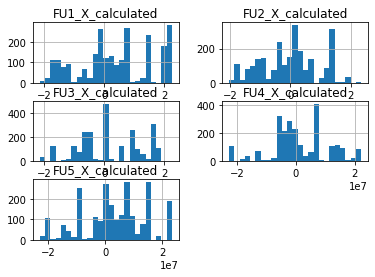

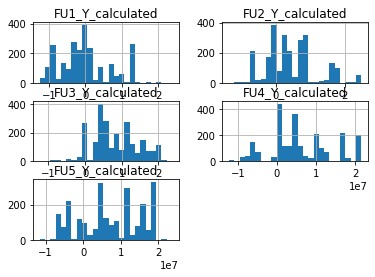

In [7]:
df.hist(['FU1_X_calculated', 'FU2_X_calculated', 'FU3_X_calculated', 'FU4_X_calculated', 'FU5_X_calculated'], bins=25)
df.hist(['FU1_Y_calculated', 'FU2_Y_calculated', 'FU3_Y_calculated', 'FU4_Y_calculated', 'FU5_Y_calculated'], bins=25)

In [8]:
# Compute X and Y differences for each arm
for i in range(1, 6):
    for d in ['X', 'Y']:
        df['FU{}_d{}'.format(i, d)] = df['FU{}_{}_observed'.format(i, d)] - df['FU{}_{}_calculated'.format(i, d)]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121192880>,
      dtype=object)

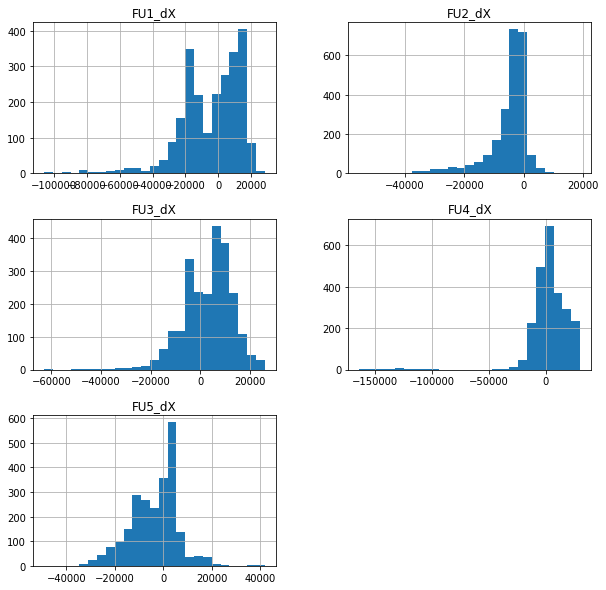

In [9]:
df.hist(['FU1_dX', 'FU2_dX', 'FU3_dX', 'FU4_dX', 'FU5_dX'], bins=25, figsize=(10, 10))

In [10]:
# Drop some columns
cols_to_drop = []

for i in range(1, 6):
    for d in ['X', 'Y']:
        cols_to_drop.append('FU{}_{}_observed'.format(i, d))
        
df2 = df.drop(labels=cols_to_drop, axis=1, inplace=False)

In [11]:
df2.corr(method='spearman').FU1_dX.abs().sort_values(ascending=False)

FU1_dX              1.000000
FU5_dX              0.564861
FU2_X_calculated    0.488550
FU2_Delta_dec       0.444235
FU1_Delta_ra        0.432139
FU4_dY              0.415801
FU1_X_calculated    0.400284
FU5_dec             0.398999
FU4_X_calculated    0.394309
FU4_Delta_ra        0.392647
FU3_dec             0.389351
FU4_dec             0.389140
dec                 0.389081
FU1_dec             0.389041
FU2_dec             0.389009
FU1_Y_calculated    0.380654
FU1_Delta_dec       0.372935
FU5_distance        0.359627
FU4_Delta_dec       0.355625
FU5_Delta_dec       0.351300
FU5_X_calculated    0.347005
FU2_dX              0.301365
az                  0.295220
FU3_Delta_ra        0.291010
FU3_X_calculated    0.285301
FU3_Delta_dec       0.274152
FU5_Delta_Teff      0.266316
FU3_dY              0.257562
ha                  0.256546
FU2_Delta_ra        0.254198
FU4_Y_calculated    0.209848
FU3_Delta_Teff      0.200858
FU3_dX              0.188114
FU3_distance        0.182259
airmass       

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(df2.FU2_dX, df2.FU1_dX, s=df2.FU5_dX/1e2, c=df2.FU4_dX, alpha=0.3, label='FU5_dX')
plt.legend(loc=0)
plt.colorbar()

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(df2.ha, df2.FU1_dX, c=df2.dec, alpha=1, label='FU5_dX')
plt.legend(loc=0)
plt.colorbar(label='Dec')

In [12]:
# cond = df2.FU1_dX > -30000
cond = df2.alt >= 30.0

X = df2.loc[cond, ('ha', 'dec', 'airmass', 'alt', 'FU1_Delta_dec', 'FU1_Delta_ra', 'FU1_X_calculated', 'FU1_Y_calculated')]
t = df2.loc[cond, ['FU1_dX', 'FU1_dY']]

In [13]:
sum(~cond)

20

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split train test
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.2, random_state=1234)

# Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, t_train)

# Metrics
y_train = lr.predict(X_train)

print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(t_train, y_train))))

RMSE: 7535.21


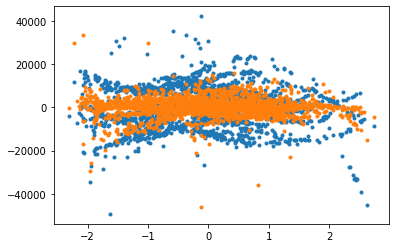

In [16]:
res = t_train - y_train

plt.plot(X_train[:, 0], res, '.')

In [17]:
from utils import hat_matrix
H = hat_matrix(X_train)

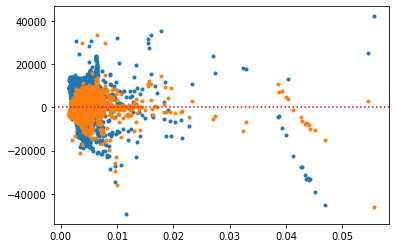

In [18]:
plt.plot(np.diag(H), res, '.')
plt.axhline(0, color='r', ls=':')

**What out for those outliers!**


In [ ]:
# Remove high-leverage points
ind = np.diag(H) > 0.05

lr.fit(X_train[~ind], t_train[~ind])
y_train = lr.predict(X_train[~ind])

print('RMSE (train): {:.2f}'.format(np.sqrt(mean_squared_error(t_train[~ind], y_train))))



In [ ]:
plt.semilogx(np.diag(H)[~ind], y_train - t_train[~ind], '.')
plt.axhline(0, color='r', ls=':')

## Polynomial Regression

In [19]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

pr = LinearRegression(fit_intercept=False)

pr.fit(X_train_poly, t_train)
y_train = pr.predict(X_train_poly)
y_test =  pr.predict(X_test_poly)
print('RMSE (train): {:.2f}'.format(np.sqrt(mean_squared_error(t_train, y_train))))
print('RMSE (test): {:.2f}'.format(np.sqrt(mean_squared_error(t_test, y_test))))

RMSE (train): 2825.94
RMSE (test): 2838.51


In [20]:
X_train_poly.shape

(1900, 45)

## Decision Tree

In [21]:
# Let's hit it harder
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=51)
dt.fit(X_train, t_train)

# Metrics
y_train = dt.predict(X_train)
y_test = dt.predict(X_test)

print('RMSE (train): {:.2f}'.format(np.sqrt(mean_squared_error(t_train, y_train))))
print('RMSE (test): {:.2f}'.format(np.sqrt(mean_squared_error(t_test, y_test))))

RMSE (train): 0.00
RMSE (test): 3329.61


In [22]:
from sklearn.model_selection import GridSearchCV

gscv = GridSearchCV(dt, {'max_depth': range(2, 100)}, cv=5, scoring='neg_mean_squared_error')
gscv.fit(X_train, t_train)

print(gscv.best_params_)
print('Best RMSE (train): {:2f}'.format(np.sqrt(-gscv.best_score_)))
print('Best RMSE (test): {:2f}'.format(np.sqrt(mean_squared_error(gscv.best_estimator_.predict(X_test), t_test))))

{'max_depth': 39}
Best RMSE (train): 2902.057454
Best RMSE (test): 3273.882080


## Random Forests

In [23]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=500)
rfr.fit(X_train, t_train)

y_train = rfr.predict(X_train)
y_test =  rfr.predict(X_test)
print('RMSE (train): {:.2f}'.format(np.sqrt(mean_squared_error(t_train, y_train))))
print('RMSE (test): {:.2f}'.format(np.sqrt(mean_squared_error(t_test, y_test))))

RMSE (train): 909.13
RMSE (test): 2684.67


In [ ]:
plt.hist(y_test - t_test, 25)

In [ ]:
RandomForestRegressor?

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

rscv = RandomizedSearchCV(rfr, {'max_depth': randint(2, 20), 'n_estimators': randint(100, 500)}, 
                          n_iter=20, cv=5, scoring='neg_mean_squared_error')
rscv.fit(X_train, t_train)

print(rscv.best_params_)
print('Best RMSE (train): {:2f}'.format(np.sqrt(-rscv.best_score_)))
print('Best RMSE (test): {:2f}'.format(np.sqrt(mean_squared_error(rscv.best_estimator_.predict(X_test), t_test))))

In [24]:
y_train = rscv.best_estimator_.predict(X_train)
y_test = rscv.best_estimator_.predict(X_test)

NameError: name 'rscv' is not defined

In [ ]:
plt.hist(y_test - t_test, 25)

In [ ]:
plt.scatter(t_train, y_train, label='train data')
plt.scatter(t_test, y_test, label='test data')
plt.legend(loc=0)
plt.xlabel('FU1_dX [target]', fontsize=16)
plt.ylabel('FU1_dX [predicted]', fontsize=16)
plt.savefig('/Users/rodrigo/EXOML/extra/plots/RF_run1.pdf')

I am tempted to repeat everything for points >-30000

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbr  = GradientBoostingRegressor()

gbr.fit(X_train, t_train)
y_train = gbr.predict(X_train)
y_test = gbr.predict(X_test)

print('RMSE (train): {:.2f}'.format(np.sqrt(mean_squared_error(t_train, y_train))))
print('RMSE (test): {:.2f}'.format(np.sqrt(mean_squared_error(t_test, y_test))))